# Malaria Detection

In [2]:
pip --version

pip 19.1.1 from C:\Users\Sunitha\Anaconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade tensorflow --user

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/67/e1/434566ffce04448192369c1a282931cf4ae593e91907558eaecd2e9f2801/termcolor-2.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/e2/8bf618c7c30a525054230ee6d40b036d3e5abc2c4ff67cf7c7420a519204/tensorflow_estimator-2.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7befa1635af716a9ebdfe3fb9dce0ca4b522ce/libclang-16.0.6-py2.py3-none-win_amd64.whl
  Using cached https

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Users\Sunitha\AnacondaProjects\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80134624/80134624 [==============================] - 35s 0us/step


In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Train/*')

In [9]:
folders

['C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Train\\Parasite',
 'C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Train\\Uninfected']

In [10]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.layers import MaxPooling2D

In [14]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [27]:
training_set

In [28]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Sunitha\AnacondaProjects\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 38s 2s/step - loss: 2.4174 - accuracy: 0.5312 - val_loss: 0.6554 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.6898 - accuracy: 0.5312 - val_loss: 0.6593 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 20s 2s/step - loss: 0.6589 - accuracy: 0.6490 - val_loss: 0.6947 - val_accuracy: 0.4627
Epoch 4/50
13/13 [==============================] - 20s 2s/step - loss: 0.6190 - accuracy: 0.6803 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 5/50
13/13 [==============================] - 20s 2s/step - loss: 0.5809 - accuracy: 0.6659 - val_loss: 0.9677 - val_accuracy: 0.3284
Epoch 6/50
13/13 [==============================] - 21s 2s/step - loss: 0.5027 - accuracy: 0.7452 - val_loss: 0.8188 - val_accuracy: 0.4104
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.4656 - accuracy: 0.7476 - val_loss: 1.0057 - val_accuracy: 0.3731
Epoch 8/50
13/13 [==

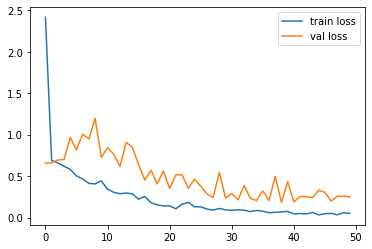

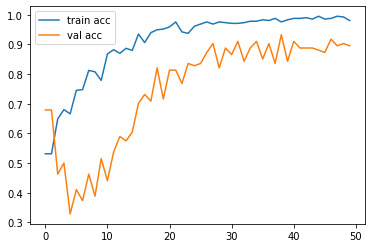

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [33]:

y_pred = model.predict(test_set)


5/5 [==============================] - 2s 251ms/step


In [34]:
y_pred

array([[8.15148234e-01, 1.84851781e-01],
       [9.99754727e-01, 2.45258154e-04],
       [1.08524852e-01, 8.91475141e-01],
       [2.16589391e-01, 7.83410609e-01],
       [9.98490095e-01, 1.50989951e-03],
       [3.34142804e-01, 6.65857196e-01],
       [1.31487325e-01, 8.68512690e-01],
       [9.99834061e-01, 1.65939869e-04],
       [1.19768977e-01, 8.80231023e-01],
       [3.14618617e-01, 6.85381413e-01],
       [9.99996305e-01, 3.68665951e-06],
       [6.51874393e-02, 9.34812605e-01],
       [9.99376714e-01, 6.23333966e-04],
       [9.99969006e-01, 3.09616407e-05],
       [2.42736079e-02, 9.75726426e-01],
       [2.95984317e-02, 9.70401525e-01],
       [8.98049325e-02, 9.10195053e-01],
       [7.38972202e-02, 9.26102817e-01],
       [9.99998927e-01, 1.04308492e-06],
       [7.29903817e-01, 2.70096183e-01],
       [9.99121487e-01, 8.78510647e-04],
       [9.99265492e-01, 7.34535803e-04],
       [1.32009089e-01, 8.67990911e-01],
       [1.94394633e-01, 8.05605352e-01],
       [9.985851

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('model_vgg19.h5')

In [39]:
img=image.load_img('C:\\Users\\Sunitha\\Desktop\\DS\\Malaria-Detection-master\\Dataset\\Dataset\\Test\\Uninfected\\2.png',target_size=(224,224))



In [40]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

1/1 [==============================] - 1s 653ms/step


array([[1., 0.]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 105ms/step


In [46]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
